# CORRELATIONS: POWERFUL OR MEANINGLESS?

# Table of Contents <a id='toc0'></a>  
- 1. [Introduction](#toc1) 
- 2. [Data Description](#toc2)  
  - 2.1. [Importing](#toc2_1)  
  - 2.2. [Cleaning](#toc2_2)
  - 2.3. [Merging](#toc2_3)  
- 3. [Correlations](#toc3) 
  - 3.1. [Plotting](#toc3_1)   
  - 3.2. [Discussion](#toc3_2)    
- 4. [Detrended Correlations](#toc4)  
- 5. [Conclusion](#toc5)  

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1'></a>[Introduction](#toc0)

**Correlation** is a statistical measure that describes the extent to which two variables move together:
    
- If the value of one variable increases as the other increases, the correlation is positive;
 
- If one decreases as the other increases, the correlation is negative.

When statistically significant correlation results are found, interesting conclusions can be drawn. 

However, correlations can be misleading... Not all correlations imply causality! Some correlations might be coincidental or due to an unseen third factor, leading to **spurious relationships**.

The aim of this project is to illustrate how correlations can be both powerful and tricky, through the correlation analysis of two pairs of variables: 

- U.S. GDP per capita and Life Expectancy - Two variables that we can find strong potential reasons to move together.
- World Chicken production and Percentage of Individuals Using the Internet - two variables that seem to be independent of each other. 


# 2. <a id='toc2'></a>[Data Description](#toc0)

All the data used in this project were extracted from Our World in Data, and then transferred to the Data folder in this repository, in April 2024: 
- Chicken Production (per tonne):  https://ourworldindata.org/grapher/chicken-meat-production?tab=chart 
- Adoption of communication technologies per 100 people : https://ourworldindata.org/grapher/ict-adoption-per-100-people 
- GDP per Capita: https://ourworldindata.org/grapher/gdp-per-capita-maddison?tab=chart
- Life expectancy: https://ourworldindata.org/grapher/life-expectancy

## 2.1. <a id='toc2_1'></a>[Importing](#toc0)

In [165]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


In [166]:
# Importing datasets
import os 

# Using assert to check that paths exist on computer.
assert os.path.isdir('data/')
assert os.path.isfile('data/chicken-meat-production.xlsx')
assert os.path.isfile('data/ict-adoption-per-100-people.xlsx')
assert os.path.isfile ('data/gdp-per-capita-maddison.xlsx')
assert os.path.isfile ('data/life-expectancy.xlsx')

# Print everything in data
os.listdir('data/')

['life-expectancy.xlsx',
 'gdp-per-capita-maddison.xlsx',
 'ict-adoption-per-100-people.xlsx',
 'chicken-meat-production.xlsx']

## 2.2. <a id='toc2_2'></a>[Cleaning](#toc0)

In this section, we clean up the data in terms of columns and rows, removing unncessary data points and making the datasets usable in python. 

We used the py file called **DataProject.py** to define a class called **DataCleaner**. This class will allow to replicate our  data cleaning methods across out four files. 

In [167]:
from dataproject import DataCleaner

### Chicken Production Data

In [168]:
filename1 = 'data/chicken-meat-production.xlsx' # Open the file and have a look at it
pd.read_excel(filename1).head(10)

,chicken-meat-production,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Entity,Code,Year,"Meat, chicken | 00001058 || Production | 00551..."
1,Afghanistan,AFG,1961,5600
2,Afghanistan,AFG,1962,6000
3,Afghanistan,AFG,1963,6160
4,Afghanistan,AFG,1964,6400
5,Afghanistan,AFG,1965,6800
6,Afghanistan,AFG,1966,7200
7,Afghanistan,AFG,1967,7600
8,Afghanistan,AFG,1968,8000
9,Afghanistan,AFG,1969,9600


There are several aspects to be cleaned in this dataset:
 
**(1) Unnamed headings**: There are some 'unnamed' headings from row 1; we will be skipping that row.

**(2) Last column title**: The final column title is unreadable, hence we will rename it.

**(3) Dropping Codes**: For the purpose of our analysis the code column is not needed - some are country codes, some are other types of codes, and many are blank. We will remove this column. 

**(4) Year Names**: Having a variable named as a number can cause problems with some functions in python. Therefore, we will alter all dates from '[year]' to 'p[year]'

**(5) Dropping Unnecessary Obseravations**: We are interested in the world consumption, not individual countries. We will be removing all entities that are countries. 

**(6) Ressetting the Index**: We then need to restart the Index



In [169]:
# 1. Cleaning 'unnamed rows'
chicken_prod_cleaner = DataCleaner(filename1, skip_rows=1)

# 2. Fixing title heading for tonnes of production
chicken_prod_cleaner.rename_columns({'Meat, chicken | 00001058 || Production | 005510 || tonnes':'Chicken Production (per tonne)'})

# 3. Removing 'code' column
chicken_prod_cleaner.drop_columns(['Code'])

# 4. Setting up new year names
chicken_prod_cleaner.new_year_name()

# 5. Dropping all else except world consumption
chicken_prod_cleaner.keep_rows('Entity','World')

# 6. Fixing index, now that we have dropped a lot of rows
chicken_prod_cleaner.restart_index()
chicken_prod= chicken_prod_cleaner.get_cleaned_data()

# Final Check
chicken_prod.head()


,Entity,Year,Chicken Production (per tonne)
0,World,p1961,7555182.0
1,World,p1962,7883740.5
2,World,p1963,8371885.0
3,World,p1964,8676732.0
4,World,p1965,9414006.0


As we can see in our final check, our clean has worked, and we will now move on with the same process, using our **DataCleaner** file for simplicity and neatness.

### Usage of Internet

In [170]:
filename2 = 'data/ict-adoption-per-100-people.xlsx' # open the file and have a look at it
pd.read_excel(filename2).head(5)

,ict-adoption-per-100-people,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Entity,Code,Year,Fixed telephone subscriptions (per 100 people),Fixed broadband subscriptions (per 100 people),Mobile cellular subscriptions (per 100 people),Individuals using the Internet (% of population)
1,Afghanistan,AFG,1960,0.089302,NaN,0,NaN
2,Afghanistan,AFG,1961,0.085584,NaN,NaN,NaN
3,Afghanistan,AFG,1962,0.085584,NaN,NaN,NaN
4,Afghanistan,AFG,1963,0.085584,NaN,NaN,NaN


Here, we have the same data cleaning process as done above, as well as dropping the missing values to avoid data inconsistencies.   

In [171]:
#Clean tech data
tech_cleaner = DataCleaner(filename2, skip_rows=1)
tech_cleaner.drop_columns(['Code','Fixed telephone subscriptions (per 100 people)' , 'Fixed broadband subscriptions (per 100 people)', 'Mobile cellular subscriptions (per 100 people)'])
tech_cleaner.new_year_name()
tech_cleaner.keep_rows('Entity','World')
tech_cleaner.drop_missing_values()
tech_cleaner.restart_index()
tech = tech_cleaner.get_cleaned_data()

tech.head()

,Entity,Year,Individuals using the Internet (% of population)
0,World,p1990,0.048825
1,World,p1991,0.078811
2,World,p1992,0.125186
3,World,p1993,0.179007
4,World,p1994,0.360508


### GDP per Capita

In [172]:
filename3 = 'data/gdp-per-capita-maddison.xlsx' # open the file and have a look at it
pd.read_excel(filename3).head(5)

,gdp-per-capita-maddison,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Entity,Code,Year,GDP per capita,417485-annotations
1,Afghanistan,AFG,1950,1156,NaN
2,Afghanistan,AFG,1951,1170,NaN
3,Afghanistan,AFG,1952,1189,NaN
4,Afghanistan,AFG,1953,1240,NaN


In [173]:
# Clean GDP data
gdp_cleaner = DataCleaner(filename3, skip_rows=1)
gdp_cleaner.drop_columns(['Code','417485-annotations'])
gdp_cleaner.new_year_name()
gdp_cleaner.keep_rows('Entity','United States')
gdp_cleaner.drop_missing_values()
gdp_cleaner.restart_index()
gdp_data = gdp_cleaner.get_cleaned_data()


gdp_data.head()

,Entity,Year,GDP per capita
0,United States,p1650,897.0000
1,United States,p1720,1768.9856
2,United States,p1775,2419.0000
3,United States,p1800,2545.4880
4,United States,p1801,2591.7695


### Life Expectancy

In [174]:
filename4 = 'data/life-expectancy.xlsx' # open the file and have a look at it
pd.read_excel(filename4).head(5)

,life-expectancy,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Entity,Code,Year,Period life expectancy at birth - Sex: all - A...
1,Afghanistan,AFG,1950,27.7275
2,Afghanistan,AFG,1951,27.9634
3,Afghanistan,AFG,1952,28.4456
4,Afghanistan,AFG,1953,28.9304


In [175]:
# Clean Life Expectancy data
life_exp_cleaner = DataCleaner(filename4, skip_rows=1)
life_exp_cleaner.rename_columns({'Period life expectancy at birth - Sex: all - Age: 0':'Life expectancy at birth (years)'})
life_exp_cleaner.drop_columns('Code')
life_exp_cleaner.new_year_name()
life_exp_cleaner.keep_rows('Entity','United States')
life_exp_cleaner.drop_missing_values()
life_exp_cleaner.restart_index()
life_exp_data = life_exp_cleaner.get_cleaned_data()


life_exp_data.head()

,Entity,Year,Life expectancy at birth (years)
0,United States,p1880,39.41
1,United States,p1890,45.21
2,United States,p1901,49.30
3,United States,p1902,50.50
4,United States,p1903,50.60


## 2.3. <a id='toc2_3'></a>[Merging](#toc0)

To analyse the correlations, we need to merge the two relevant data sets together. We begin by examining the number of years and regions each one has. 

### Chicken Production + Internet Usage

In [176]:
print(f'Years in Chicken Production: {chicken_prod.Year.unique()}')
print(f'Regions in Chicken Production = {len(chicken_prod.Entity.unique())}')
print(f'Years in Communication Technology : {tech.Year.unique()}')
print(f'Regions in Communication Technology = {len(tech.Entity.unique())}')

Years in Chicken Production: ['p1961' 'p1962' 'p1963' 'p1964' 'p1965' 'p1966' 'p1967' 'p1968' 'p1969'
 'p1970' 'p1971' 'p1972' 'p1973' 'p1974' 'p1975' 'p1976' 'p1977' 'p1978'
 'p1979' 'p1980' 'p1981' 'p1982' 'p1983' 'p1984' 'p1985' 'p1986' 'p1987'
 'p1988' 'p1989' 'p1990' 'p1991' 'p1992' 'p1993' 'p1994' 'p1995' 'p1996'
 'p1997' 'p1998' 'p1999' 'p2000' 'p2001' 'p2002' 'p2003' 'p2004' 'p2005'
 'p2006' 'p2007' 'p2008' 'p2009' 'p2010' 'p2011' 'p2012' 'p2013' 'p2014'
 'p2015' 'p2016' 'p2017' 'p2018' 'p2019' 'p2020' 'p2021' 'p2022']
Regions in Chicken Production = 1
Years in Communication Technology : ['p1990' 'p1991' 'p1992' 'p1993' 'p1994' 'p1995' 'p1996' 'p1997' 'p1998'
 'p1999' 'p2000' 'p2001' 'p2002' 'p2003' 'p2004' 'p2005' 'p2006' 'p2007'
 'p2008' 'p2009' 'p2010' 'p2011' 'p2012' 'p2013' 'p2014' 'p2015' 'p2016'
 'p2017' 'p2018' 'p2019' 'p2020']
Regions in Communication Technology = 1


In [177]:
# Finding Differences:
diff_y = [y for y in chicken_prod.Year.unique() if y not in tech.Year.unique()] 
print(f'Years in Chicken Production data, but not in Communication Technology data: {diff_y}')


Years in Chicken Production data, but not in Communication Technology data: ['p1961', 'p1962', 'p1963', 'p1964', 'p1965', 'p1966', 'p1967', 'p1968', 'p1969', 'p1970', 'p1971', 'p1972', 'p1973', 'p1974', 'p1975', 'p1976', 'p1977', 'p1978', 'p1979', 'p1980', 'p1981', 'p1982', 'p1983', 'p1984', 'p1985', 'p1986', 'p1987', 'p1988', 'p1989', 'p2021', 'p2022']


We can see that Chicken production data covers more years than the Communication Technology dataset. However, since the purpose of this analysis is to compute correlations, we want to avoid having missing values for Communication Technology. Therefore, we will use the **inner** merging method. This method ensures that we merge only the years that both datasets have in common, thereby dropping the remaining years. 

In [178]:
# Inner Merging:
chicken_tech = pd.merge(chicken_prod,tech,how='inner',on=['Entity','Year'])

print(f'Number of years          = {len(chicken_tech.Year.unique())}')

chicken_tech.head(10)

Number of years          = 31


,Entity,Year,Chicken Production (per tonne),Individuals using the Internet (% of population)
0,World,p1990,35415424.0,0.048825
1,World,p1991,38191256.0,0.078811
2,World,p1992,39851016.0,0.125186
3,World,p1993,42397028.0,0.179007
4,World,p1994,44822450.0,0.360508
5,World,p1995,47566492.0,0.683082
6,World,p1996,49159212.0,1.326567
7,World,p1997,52318396.0,2.042697
8,World,p1998,54535188.0,3.140580
9,World,p1999,56892450.0,4.632903


### GDP per Capita + Life Expectancy

The exact same reasoning is applied as above. 

In [179]:
print(f'Years in GDP per Capita = {len(gdp_data.Year.unique())}')
print(f'Regions in GDP per Capita = {len(gdp_data.Entity.unique())}')
print(f'Years in Life Expectancy = {len(life_exp_data.Year.unique())}')
print(f'Regions in Life Expectancy = {len(life_exp_data.Entity.unique())}')

Years in GDP per Capita = 222
Regions in GDP per Capita = 1
Years in Life Expectancy = 123
Regions in Life Expectancy = 1


In [180]:
# Finding Differences:
diff_y = [y for y in gdp_data.Year.unique() if y not in life_exp_data.Year.unique()] 
print(f'Years in GDP per Capita data, but not in Life Expectancy data: {diff_y}')


Years in GDP per Capita data, but not in Life Expectancy data: ['p1650', 'p1720', 'p1775', 'p1800', 'p1801', 'p1802', 'p1803', 'p1804', 'p1805', 'p1806', 'p1807', 'p1808', 'p1809', 'p1810', 'p1811', 'p1812', 'p1813', 'p1814', 'p1815', 'p1816', 'p1817', 'p1818', 'p1819', 'p1820', 'p1821', 'p1822', 'p1823', 'p1824', 'p1825', 'p1826', 'p1827', 'p1828', 'p1829', 'p1830', 'p1831', 'p1832', 'p1833', 'p1834', 'p1835', 'p1836', 'p1837', 'p1838', 'p1839', 'p1840', 'p1841', 'p1842', 'p1843', 'p1844', 'p1845', 'p1846', 'p1847', 'p1848', 'p1849', 'p1850', 'p1851', 'p1852', 'p1853', 'p1854', 'p1855', 'p1856', 'p1857', 'p1858', 'p1859', 'p1860', 'p1861', 'p1862', 'p1863', 'p1864', 'p1865', 'p1866', 'p1867', 'p1868', 'p1869', 'p1870', 'p1871', 'p1872', 'p1873', 'p1874', 'p1875', 'p1876', 'p1877', 'p1878', 'p1879', 'p1881', 'p1882', 'p1883', 'p1884', 'p1885', 'p1886', 'p1887', 'p1888', 'p1889', 'p1891', 'p1892', 'p1893', 'p1894', 'p1895', 'p1896', 'p1897', 'p1898', 'p1899', 'p1900']


Given our analysis purposes, we use again the inner merge method. 

In [181]:
# Inner Merging:
gdp_life_exp = pd.merge(gdp_data,life_exp_data,how='inner',on=['Entity','Year'])

print(f'Number of years          = {len(gdp_life_exp.Year.unique())}')

gdp_life_exp.head(10)

Number of years          = 120


,Entity,Year,GDP per capita,Life expectancy at birth (years)
0,United States,p1880,6255.7295,39.41
1,United States,p1890,6664.5503,45.21
2,United States,p1901,8770.3630,49.30
3,United States,p1902,8684.2280,50.50
4,United States,p1903,8941.3480,50.60
5,United States,p1904,8663.6580,49.60
6,United States,p1905,9121.3320,50.30
7,United States,p1906,9980.1130,50.10
8,United States,p1907,9950.5440,50.20
9,United States,p1908,8975.9770,51.90


# 3. <a id='toc3'></a>[Correlations](#toc0)

A way to visualize possible correlations is by plotting the data series graphically:

## 3.1. <a id='toc3_1'></a>[Plotting](#toc0)

### GDP per Capita + Life Expectancy

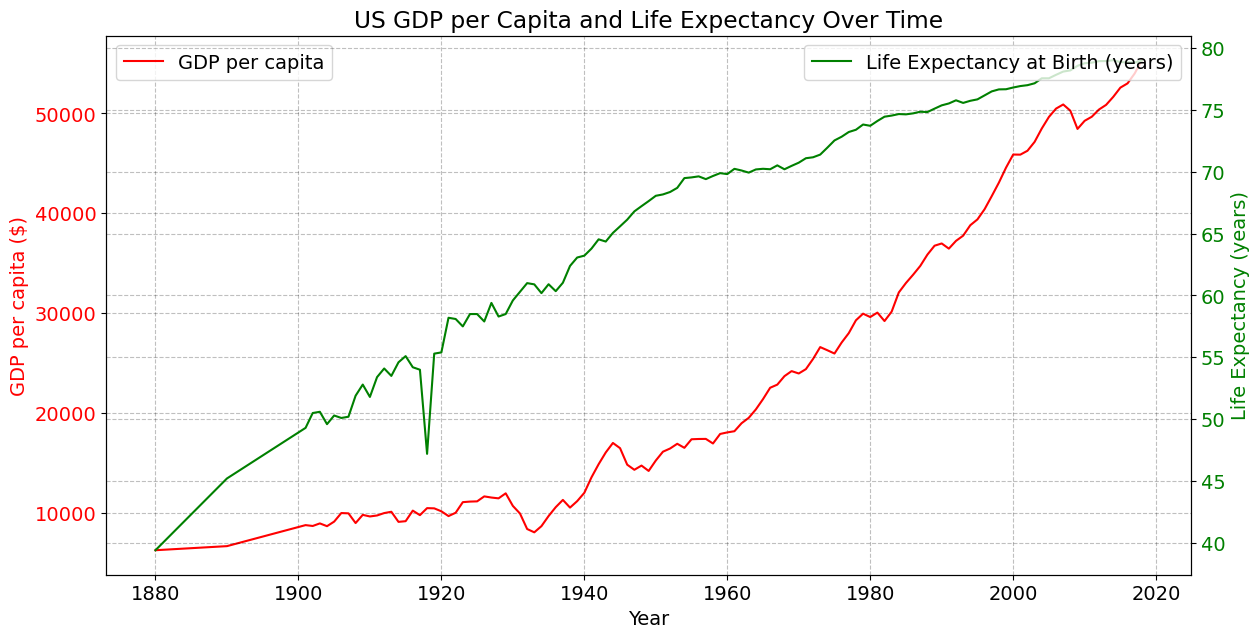

In [182]:
# Convert 'Year' from the format 'pYYYY' to 'YYYY' for cleaner graph
gdp_life_exp['Year'] = gdp_life_exp['Year'].str.replace('p', '').astype(int)

# Set the figure size
plt.figure(figsize=(14, 7))

# Plot GDP per capita data with the primary y-axis (left)
ax1 = plt.gca()  # Get the current Axes instance on the current figure matching
ax1.plot(gdp_life_exp['Year'], gdp_life_exp['GDP per capita'], color='r', label='GDP per capita')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita ($)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create a secondary y-axis (right) that shares the same x-axis for life expectancy data
ax2 = ax1.twinx()
ax2.plot(gdp_life_exp['Year'], gdp_life_exp['Life expectancy at birth (years)'], color='g', label='Life Expectancy at Birth (years)')
ax2.set_ylabel('Life Expectancy (years)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set the title and show the plot with the legend
plt.title('US GDP per Capita and Life Expectancy Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


The graph suggests that both US GDP per capita and Life expectancy move together, exhibiting an increasing trend over time. Let's examine the correlation coefficient to better understand these co-movements. 

In [183]:
# Compute the correlation between chicken production and internet usage
correlation = gdp_life_exp['GDP per capita'].corr(gdp_life_exp['Life expectancy at birth (years)'])

print(f"The correlation between U.S. GDP per Capita and Life Expectancy is: {correlation}")

The correlation between U.S. GDP per Capita and Life Expectancy is: 0.8649575032867545


### Chicken Production + Internet Usage

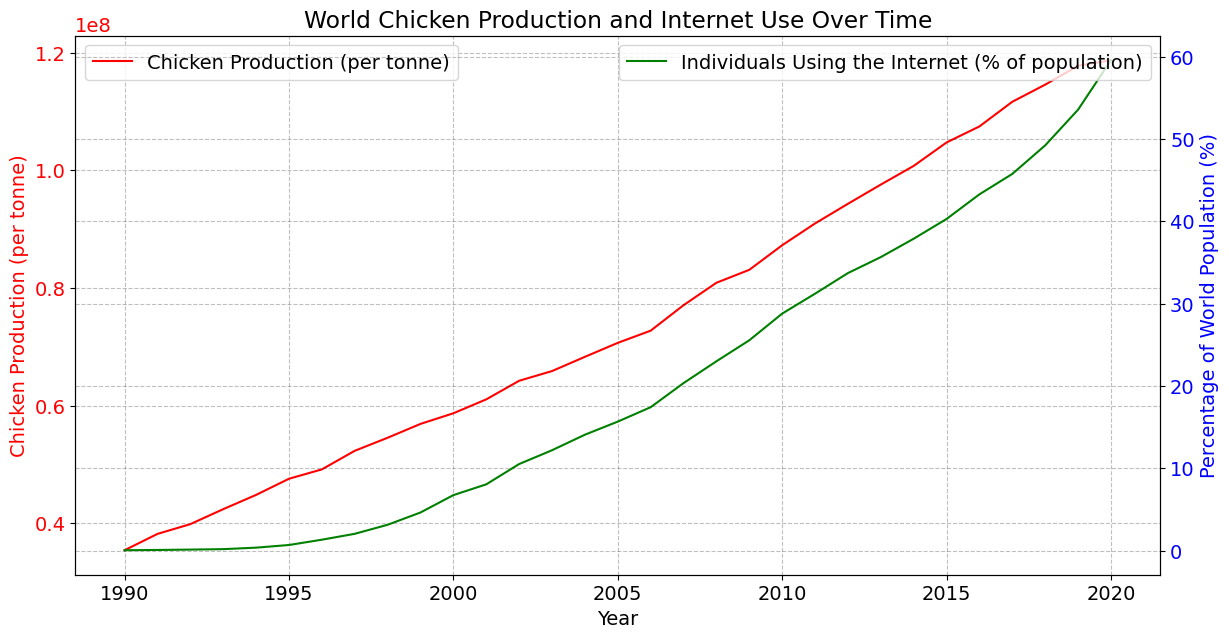

In [184]:
# Convert 'Year' from the format 'pYYYY' to 'YYYY' for cleaner graph
chicken_tech['Year'] = chicken_tech['Year'].str.replace('p', '').astype(int)

# Set the figure size
plt.figure(figsize=(14, 7))

# As we are using two data sets with different measurement units, we will be defining two different y-axis (left and right):

# Plot the Chicken Production data with the primary y-axis (left)
ax1 = plt.gca()  # Get the current Axes instance on the current figure matching
ax1.plot(chicken_tech['Year'], chicken_tech['Chicken Production (per tonne)'], color='r', label='Chicken Production (per tonne)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Chicken Production (per tonne)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create a secondary y-axis (right) that shares the same x-axis for Internet data
ax2 = ax1.twinx()
ax2.plot(chicken_tech['Year'], chicken_tech['Individuals using the Internet (% of population)'], color='g', label='Individuals Using the Internet (% of population)')
ax2.set_ylabel('Percentage of World Population (%)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Set the title and show the plot with the legend
plt.title('World Chicken Production and Internet Use Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

The graph suggests that both World Chicken Production and percentage of Individuals using the internet move together, exhibiting an increasing trend over time. Let's examine the correlation coefficient to better understand these co-movements. 

In [185]:
# Compute the correlation between chicken production and internet usage
correlation = chicken_tech['Chicken Production (per tonne)'].corr(chicken_tech['Individuals using the Internet (% of population)'])

print(f"The correlation between chicken production and internet usage is: {correlation}")

The correlation between chicken production and internet usage is: 0.9874445117601893


## 3.2. <a id='toc3_2'></a>[Discussion](#toc0)

The correlation between U.S. GDP per Capita and Life Expectancy is 0.865. This result indicates a strong positive relationship between the two, suggesting that as GDP per capita increases, life expectancy tends to increase as well, and vice versa.

Intuitively, this result makes sense. Higher GDP per capita typically indicates that a country is wealthier. Wealthier countries can invest more in healthcare infrastructure, medical research, and services, which can lead to better health outcomes and longer life expectancy.

Our results also show that the correlation between chicken production and internet usage is 0.987. This is a very strong positive correlation, even larger than the correlation coefficient of GDP per capita and life expectancy! 

So... Can we assert that increased internet usage directly causes a rise in chicken production?

Not really... 

This is an exemple of what is known as a spurious correlation, where two variables show a relationship not because one causes the other, but potentially due to coincidence, or because they are both influenced by a third factor, such as, possibly in this case, economic growth or technological development over time. 

Spurious correlations serve as a lesson in data analysis, emphasizing the importance of not mistaking correlation with causation. Without a theoretical basis or further analytical evidence to establish a cause-and-effect relationship, it is crucial to acknowledge that correlation alone can be highly misleading. This emphasises the necessity for rigorous statistical testing and analysis to discern true causal relationships from mere statistical artifacts.

# 4. <a id='toc4'></a>[Detrended Correlations](#toc0)

Observing our results, we see that these correlations may be driven by increasing time trends. In order to extend our research, we investigate if these correlations persist when the dataset is de-trended. For both datasets, we observe a relatively positive linear trend overtime. Therefore, we use the **detrend** function from **cripy.signal** for this analysis. Note, we use the detrending with a **linear** model function, a **constant** and **moving average** was also tried, but based on the trends, and their outcomes, linear was the best choice. 

In [186]:
from scipy.signal import detrend

### GDP + Life Expectency

In [187]:
#detrending the varables in the merged dataset
detrended_gdp = detrend(gdp_life_exp['GDP per capita'], type='linear')
detrended_life_exp = detrend(gdp_life_exp['Life expectancy at birth (years)'], type='linear')

#adding to the dataset
gdp_life_exp['Detrended GDP per capita'] = detrended_gdp
gdp_life_exp['Detrended Life expectancy at birth (years)'] = detrended_life_exp

gdp_life_exp.head()

,Entity,Year,GDP per capita,Life expectancy at birth (years),Detrended GDP per capita,Detrended Life expectancy at birth (years)
0,United States,1880,6255.7295,39.41,6504.062149,-11.469328
1,United States,1890,6664.5503,45.21,6507.013034,-5.937979
2,United States,1901,8770.3630,49.30,8206.955818,-2.116630
3,United States,1902,8684.2280,50.50,7714.950902,-1.185281
4,United States,1903,8941.3480,50.60,7566.200986,-1.353931


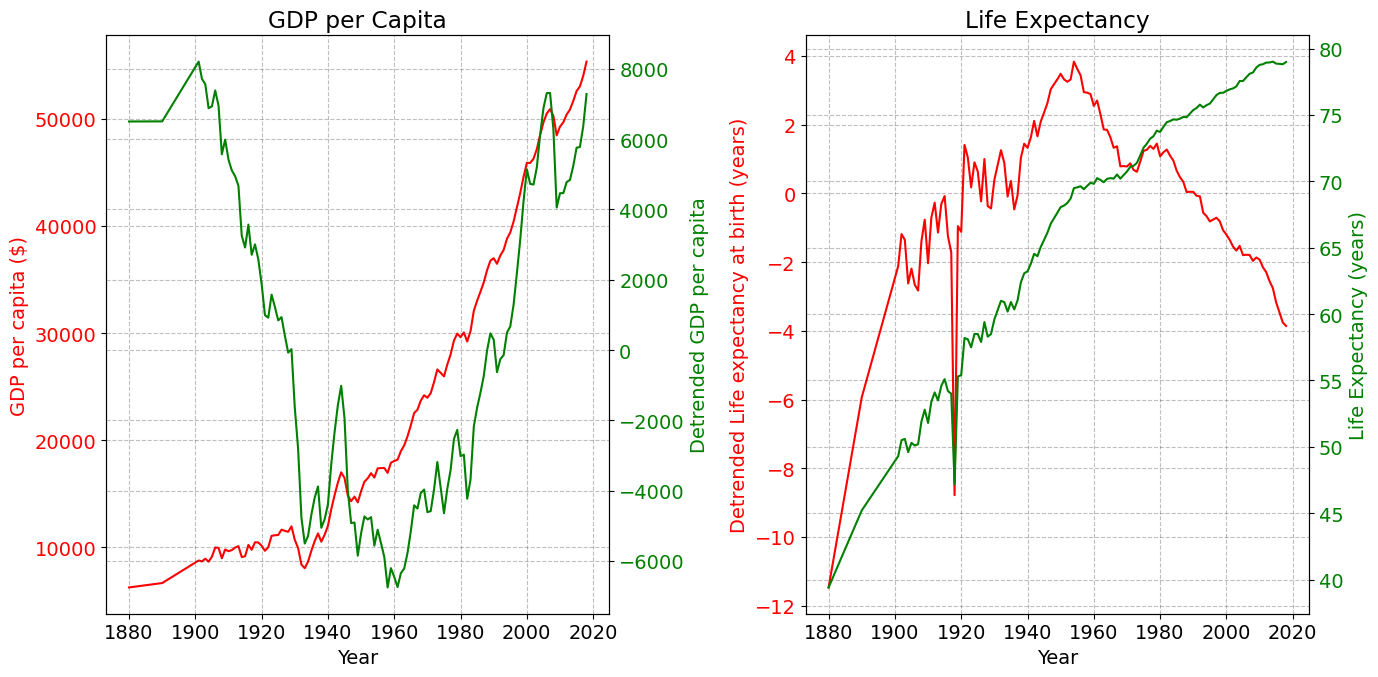

In [188]:

# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# First subplot: GDP per capita
ax1 = axes[0]
ax1.plot(gdp_life_exp['Year'], gdp_life_exp['GDP per capita'], color='r', label='GDP per capita')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per capita ($)', color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.set_title('GDP per Capita')

# Create a secondary y-axis (right) that shares the same x-axis for detrended GDP per capita
ax2 = ax1.twinx()
ax2.plot(gdp_life_exp['Year'], gdp_life_exp['Detrended GDP per capita'], color='g', label='Detrended GDP per capita')
ax2.set_ylabel('Detrended GDP per capita', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Second subplot: Detrended Life expectancy
ax3 = axes[1]
ax3.plot(gdp_life_exp['Year'], gdp_life_exp['Detrended Life expectancy at birth (years)'], color='r', label='Detrended Life expectancy at birth (years)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Detrended Life expectancy at birth (years)', color='r')
ax3.tick_params(axis='y', labelcolor='r')
ax3.set_title('Life Expectancy')

# Create a secondary y-axis (right) that shares the same x-axis for life expectancy
ax4 = ax3.twinx()
ax4.plot(gdp_life_exp['Year'], gdp_life_exp['Life expectancy at birth (years)'], color='g', label='Life Expectancy at Birth (years)')
ax4.set_ylabel('Life Expectancy (years)', color='g')
ax4.tick_params(axis='y', labelcolor='g')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


As we can see, de-trending changes the movement of GDP per capita and Life Expectency, compared to their original results. We will now proceed with plotting their detrended correlations together. 

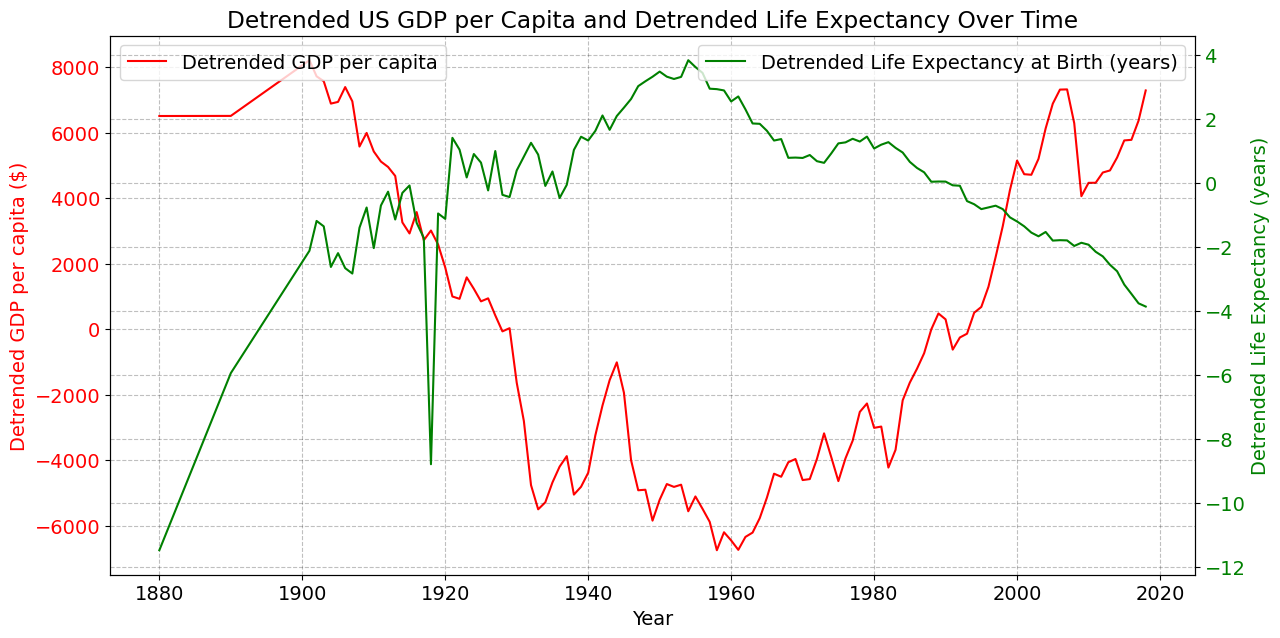

In [189]:
# Set the figure size
plt.figure(figsize=(14, 7))

# Plot GDP per capita data with the primary y-axis (left)
ax1 = plt.gca()  # Get the current Axes instance on the current figure matching
ax1.plot(gdp_life_exp['Year'], gdp_life_exp['Detrended GDP per capita'], color='r', label='Detrended GDP per capita')
ax1.set_xlabel('Year')
ax1.set_ylabel('Detrended GDP per capita ($)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create a secondary y-axis (right) that shares the same x-axis for life expectancy data
ax2 = ax1.twinx()
ax2.plot(gdp_life_exp['Year'], gdp_life_exp['Detrended Life expectancy at birth (years)'], color='g', label='Detrended Life Expectancy at Birth (years)')
ax2.set_ylabel('Detrended Life Expectancy (years)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set the title and show the plot with the legend
plt.title('Detrended US GDP per Capita and Detrended Life Expectancy Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [190]:

# Compute the correlation between chicken production and internet usage
correlation = gdp_life_exp['Detrended GDP per capita'].corr(gdp_life_exp['Detrended Life expectancy at birth (years)'])

print(f"The detrended correlation between U.S. GDP per Capita and Life Expectancy is: {correlation}")

The detrended correlation between U.S. GDP per Capita and Life Expectancy is: -0.7863081656498938


The graph suggests that when time is detrended, GDP and life expectency does not move together, 
The graph suggests that both World Chicken Production and percentage of Individuals using the internet move together, exhibiting an increasing trend over time. However, interestlingly, with the detrended data, the correlation coefficient of -0.768, which is very different to the original data's correlation of 0.865 of the original data. The fact the the correlation coefficent is negative, means that these variables move almost in opposite directions. 


### Chicken Production + Internet Usage

In [191]:
detrended_chicken_cons = detrend(chicken_tech['Chicken Production (per tonne)'], type='linear') #adding the detrending to the dataset
detrended_tech = detrend(chicken_tech['Individuals using the Internet (% of population)'], type='linear')
chicken_tech['Detrended Chicken Production (per tonne)'] = detrended_chicken_cons
chicken_tech['Detrended Individuals using the Internet (% of population)'] = detrended_tech

The detrended correlation between chicken production and internet usage is: 0.8450486291493331


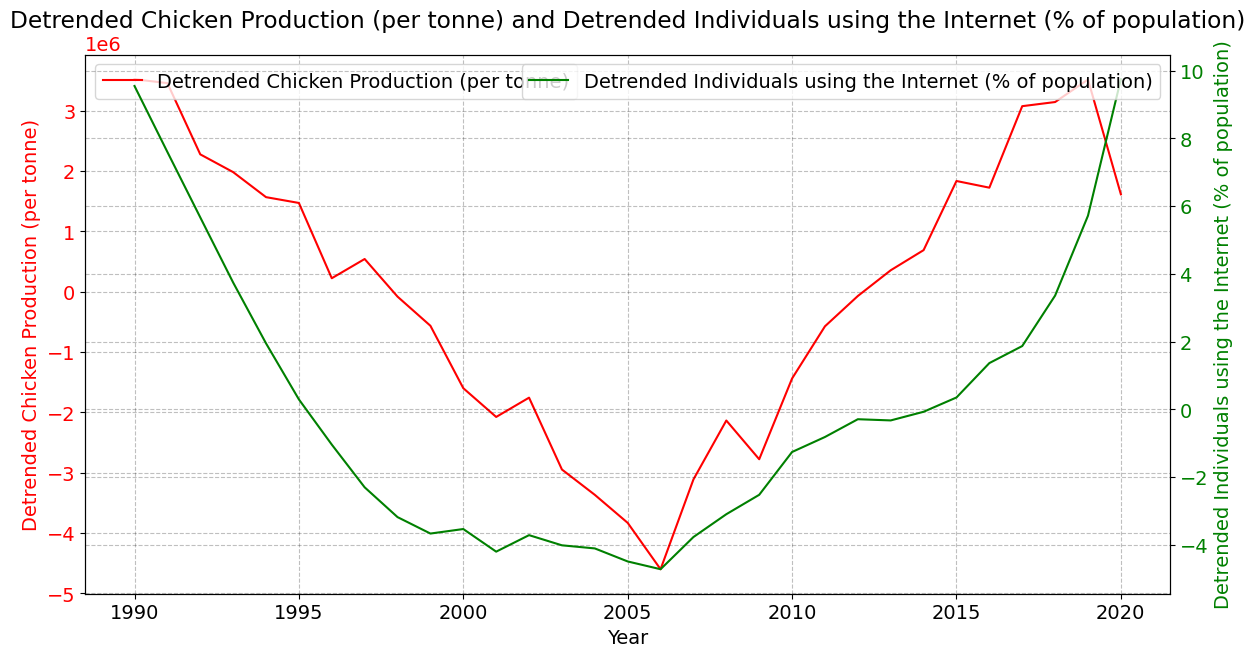

In [192]:
#Plotting  and correlation calculation
plt.figure(figsize=(14, 7)) # Set the figure size

# Plot GDP per capita data with the primary y-axis (left)
ax1 = plt.gca()  # Get the current Axes instance on the current figure matching
ax1.plot(chicken_tech['Year'], chicken_tech['Detrended Chicken Production (per tonne)'], color='r', label='Detrended Chicken Production (per tonne)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Detrended Chicken Production (per tonne)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create a secondary y-axis (right) that shares the same x-axis for life expectancy data
ax2 = ax1.twinx()
ax2.plot(chicken_tech['Year'], chicken_tech['Detrended Individuals using the Internet (% of population)'], color='g', label='Detrended Individuals using the Internet (% of population)')
ax2.set_ylabel('Detrended Individuals using the Internet (% of population)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set the title and show the plot with the legend
plt.title('Detrended Chicken Production (per tonne) and Detrended Individuals using the Internet (% of population)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Compute the correlation between chicken production and internet usage
correlation = chicken_tech['Detrended Chicken Production (per tonne)'].corr(chicken_tech['Detrended Individuals using the Internet (% of population)'])

print(f"The detrended correlation between chicken production and internet usage is: {correlation}")


Here, we see that the data exhibits a similar trend over the years, even when it has been detrended. Moreover, the correlation coefficient is close to 1, means that there is a strong and positive correlation between chicken production and internet usage. Although this is less than the orignial data's correlation of 0.987, correlation still remains strong. 

## 4. <a id='toc4'></a>[Conclusion](#toc0)

With the the orignial data, we see that the correlation between U.S. GDP per Capita and Life Expectancy is strong, and so is the correlation between chicken production and internet usage. Hoever, after a linear detrending, we see that which chicken production and internet usage maintains a strong correlation, U.S. GDP and per capital life expectency does not. 

This is a rather suprising result, as it would seem more realistic for a GDP and life exptectency to move together, as a result fo more resources such as healthcare, standards of living and social services. Contrarily, chicken consumption and internet use remains an anomaly. 

This comparisons tell use the need to factor in more things when researching correlations. For instance, adding control variables for analysis, and manipulating the data in other ways too.  